<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  SMS SPAM DETECTION </h1>
</div>


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LIBRARY IMPORTS
</div>


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.naive_bayes import MultinomialNB

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LOAD DATA
</div>

In [2]:
df = pd.read_csv(r"/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Handling missing Duplicated data
</div>

In [5]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

<!-- # Fill missing processor_type with 'unknown' -->

# Drop the duplicated data

In [6]:
df.duplicated().sum()

403

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df.shape

(5169, 2)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Encoding
</div>

# Label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['v1'] = encoder.fit_transform(df['v1'])

In [10]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
df['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

In [12]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Remove special characters and punctuation.
Convert text to lowercase.
Remove stop words.
Perform stemming .</h1>
</div>

In [13]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    ps = PorterStemmer()
    stemmed_text = [ps.stem(word) for word in filtered_text]
    return ' '.join(stemmed_text)
df['v2'] = df['v2'].apply(preprocess_text)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Splitting data
</div>

In [14]:
X = df['v2']
y = df['v1']
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train1)
X_test = vectorizer.transform(X_test1)

In [16]:
X_train

<4135x6354 sparse matrix of type '<class 'numpy.int64'>'
	with 34237 stored elements in Compressed Sparse Row format>

In [17]:
y_train

2228    0
5529    0
2149    0
5058    1
5051    0
       ..
4740    0
474     0
3266    0
4016    0
879     1
Name: v1, Length: 4135, dtype: int64

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Training and evalution of model
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;">Naive Bayes classifier
 </h1>
</div>


In [18]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [19]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [20]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)


Training Accuracy: 0.9934703748488513
Training Precision: 0.9934561329058047
Training Recall: 0.9934703748488513
Training F1 Score: 0.9934620557586109
Training Confusion Matrix:
[[3615   12]
 [  15  493]]


In [21]:

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)


Testing Accuracy: 0.9825918762088974
Testing Precision: 0.9824192012781614
Testing Recall: 0.9825918762088974
Testing F1 Score: 0.9824372613280711
Testing Confusion Matrix:
[[883   6]
 [ 12 133]]


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

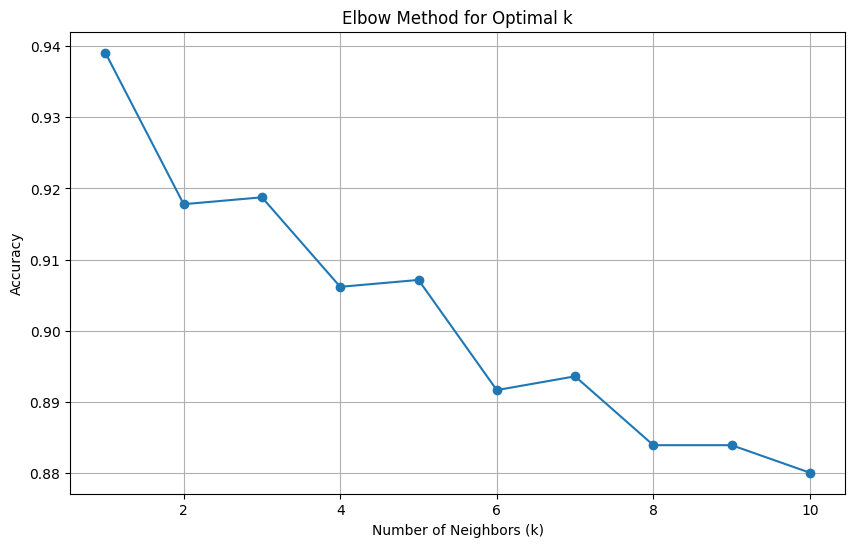

In [22]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), accuracy_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



In [23]:
# Train the KNN model with the optimal k
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [24]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)



In [25]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)

Training Accuracy: 0.9467956469165659
Training Precision: 0.949838266536622
Training Recall: 0.9467956469165659
Training F1 Score: 0.9402263316339666
Training Confusion Matrix:
[[3627    0]
 [ 220  288]]

Testing Accuracy: 0.9187620889748549
Testing Precision: 0.9257754338115581
Testing Recall: 0.9187620889748549
Testing F1 Score: 0.9040314538199925
Testing Confusion Matrix:
[[889   0]
 [ 84  61]]


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> DecisionTree </h1>
</div>

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_estimator_



Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [27]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_dt_regressor = DecisionTreeClassifier(**best_params)
best_dt_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}


DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10)

In [28]:
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)



In [29]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)

Training Accuracy: 0.966384522370012
Training Precision: 0.9658828935917202
Training Recall: 0.966384522370012
Training F1 Score: 0.9648680975416266
Training Confusion Matrix:
[[3605   22]
 [ 117  391]]


In [30]:
print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)


Testing Accuracy: 0.960348162475822
Testing Precision: 0.9597683641110825
Testing Recall: 0.960348162475822
Testing F1 Score: 0.9586093669843361
Testing Confusion Matrix:
[[882   7]
 [ 34 111]]


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> RandomForest </h1>
</div>

In [31]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_classifier = grid_search.best_estimator_




Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [32]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_regressor = RandomForestClassifier(**best_params)
best_rf_regressor.fit(X_train, y_train)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


RandomForestClassifier(min_samples_split=10, n_estimators=300)

In [33]:
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_confusion = confusion_matrix(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_confusion = confusion_matrix(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("Training Confusion Matrix:")
print(train_confusion)


Training Accuracy: 0.966384522370012
Training Precision: 0.9658828935917202
Training Recall: 0.966384522370012
Training F1 Score: 0.9648680975416266
Training Confusion Matrix:
[[3605   22]
 [ 117  391]]


In [34]:

print(f"\nTesting Accuracy: {test_accuracy}")
print(f"Testing Precision: {test_precision}")
print(f"Testing Recall: {test_recall}")
print(f"Testing F1 Score: {test_f1}")
print("Testing Confusion Matrix:")
print(test_confusion)


Testing Accuracy: 0.960348162475822
Testing Precision: 0.9597683641110825
Testing Recall: 0.960348162475822
Testing F1 Score: 0.9586093669843361
Testing Confusion Matrix:
[[882   7]
 [ 34 111]]


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Model comparison
</div>

In [35]:
models = {
    "Naive Bayes" : MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test, average='weighted')
    test_recall = recall_score(y_test, y_pred_test, average='weighted')
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    results.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision,
        "Test Recall": test_recall,
        "Test F1 Score": test_f1
    })
results_df = pd.DataFrame(results)
results_df


,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1 Score
0,Naive Bayes,0.993470,0.982592,0.982419,0.982592,0.982437
1,Random Forest,1.000000,0.977756,0.978317,0.977756,0.976940
2,Decision Tree,1.000000,0.969052,0.968490,0.969052,0.968586
3,K-Nearest Neighbors,0.924063,0.907157,0.916205,0.907157,0.886563


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Conclusion
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Naive Bayes shows excellent performance with high accuracy on both training and test sets. The precision, recall, and F1 score are all very close to each other, indicating a well-balanced model that performs consistently well on the test data.</h1>
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> Deployment </h1>
* </div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;"> step 1 : Save a trained model and a scaler vectorizer using the pickle module. </h1>
</div>

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Step 2 : create requirement.txt for accessing all libraries </h1>
</div>

In [36]:
'''
streamlit==1.29.0
pandas==2.1.4
scikit-learn==1.4.2
pillow==10.2.0
nltk==3.8.1
'''

'\nstreamlit==1.29.0\npandas==2.1.4\nscikit-learn==1.4.2\npillow==10.2.0\nnltk==3.8.1\n'

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">Step 3 : create app.py </h1>
</div>

In [37]:
'''
import streamlit as st
import pandas as pd
import pickle
import streamlit as st
import pickle
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer


html_attribution = """
    <div style="background-color:#28a745;padding:20px;margin-bottom:20px">
    <p style="color:white;text-align:center;font-size:22px;">Developed by Pruthvik Machhi</p>
    </div>
    """
st.markdown(html_attribution, unsafe_allow_html=True)

html_temp_subtitle = """
    <div style="background-color:#ff6347;padding:10px;margin-bottom:20px">
    <h2 style="color:white;text-align:center;">SPAM Detection</h2>
    </div>
    """
st.markdown(html_temp_subtitle, unsafe_allow_html=True)

st.subheader('Enter Text')


ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


tfidf = pickle.load(open('vectorizer2.pkl','rb'))
model = pickle.load(open('model3b.pkl','rb'))

st.title("SMS Spam Classifier")

input_sms = st.text_area("Enter the message")

if st.button('Predict'):
    transformed_sms = transform_text(input_sms)
    vector_input = tfidf.transform([transformed_sms])
    result = model.predict(vector_input)[0]
    if result == 1:
        st.header("Spam")
    elif result==0:
        st.header("Not Spam")

'''

'\nimport streamlit as st\nimport pandas as pd\nimport pickle\nimport streamlit as st\nimport pickle\nimport string\nfrom nltk.corpus import stopwords\nimport nltk\nfrom nltk.stem.porter import PorterStemmer\n\n\nhtml_attribution = """\n    <div style="background-color:#28a745;padding:20px;margin-bottom:20px">\n    <p style="color:white;text-align:center;font-size:22px;">Developed by Pruthvik Machhi</p>\n    </div>\n    """\nst.markdown(html_attribution, unsafe_allow_html=True)\n\nhtml_temp_subtitle = """\n    <div style="background-color:#ff6347;padding:10px;margin-bottom:20px">\n    <h2 style="color:white;text-align:center;">SPAM Detection</h2>\n    </div>\n    """\nst.markdown(html_temp_subtitle, unsafe_allow_html=True)\n\nst.subheader(\'Enter Text\')\n\n\nps = PorterStemmer()\ndef transform_text(text):\n    text = text.lower()\n    text = nltk.word_tokenize(text)\n\n    y = []\n    for i in text:\n        if i.isalnum():\n            y.append(i)\n\n    text = y[:]\n    y.clear()\n\

<div style="background-color: #66bbf1; padding: 28px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 30px;">Deploy it on server </h1>
</div>

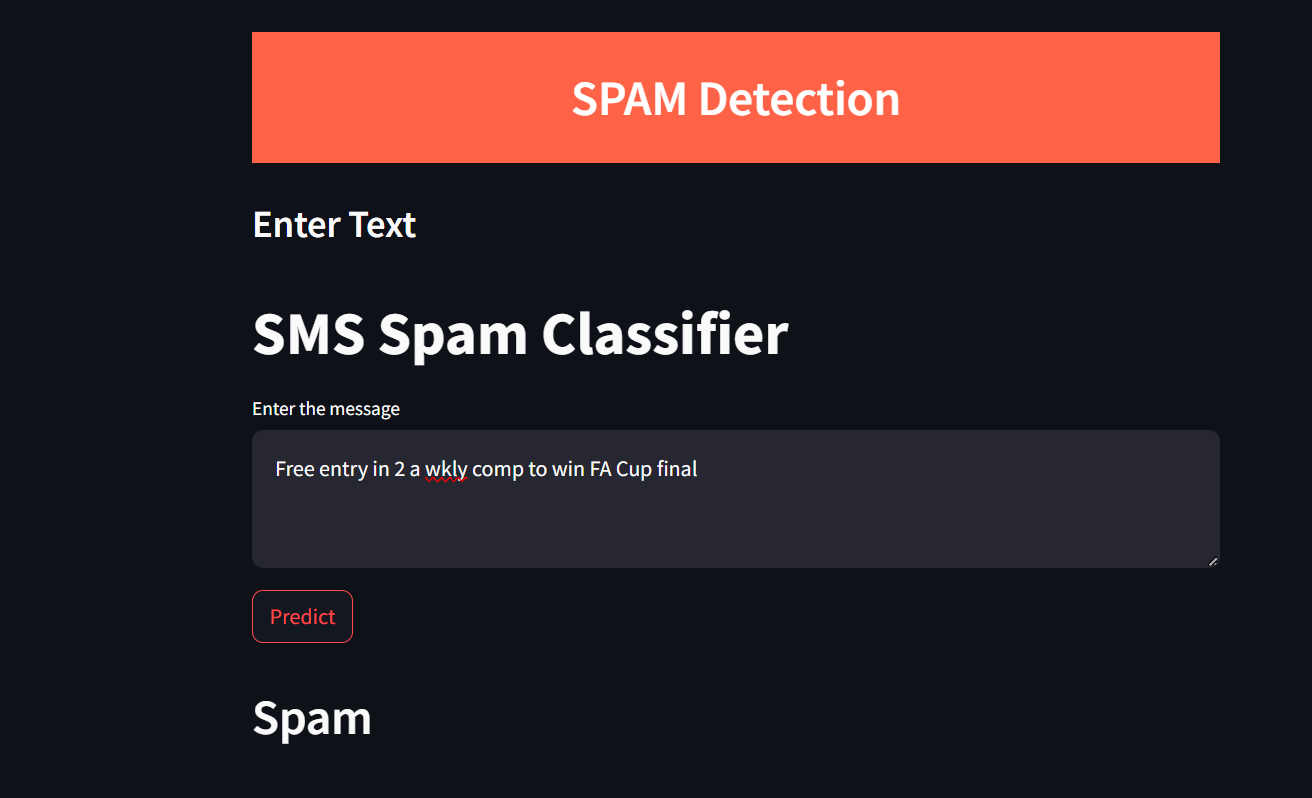

In [38]:
from IPython.display import Image
Image(filename='/kaggle/input/spam-detction/Screenshot 2024-06-18 142454.png')

<div style="background-color: #66bbf1; padding: 28px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 30px;">Find all files on my github </h1>
</div>

Github: https://github.com/Pruthvik-Machhi/Spam-detection-end-to-end

<div style="background-color: #66bbf1; padding: 28px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 30px;">Thanks for exploring my notebook. Upvote if you like the work. Also, Give your feedback in comments. </h1>
</div>